In [80]:
%pylab inline
import numpy as np
import os
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


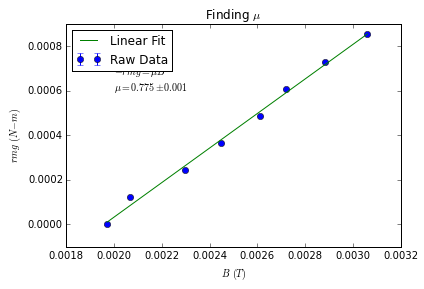

In [63]:
ydata = np.multiply([1e-6, .5, 1, 1.5, 2, 2.5, 3, 3.5],(2.482e-3*9.8)/100)
xdata = np.multiply(1.36e-3, [1.45, 1.52, 1.69, 1.8, 1.92, 2, 2.12, 2.25])
xdata_err = np.multiply(np.sqrt( np.power(np.multiply(np.ones_like(xdata), .2),2)
                         +np.power(np.divide(.05, [1.45, 1.52, 1.69, 1.8, 1.92, 2, 2.12, 2.25]), 2)), xdata)
ydata_err = np.multiply( np.sqrt(np.power(np.divide(.05e-2, [1e-6, .5, 1, 1.5, 2, 2.5, 3, 3.5]), 2) 
                                 + (1e-6/2.482e-3)**2), ydata )

p, V = np.polyfit(xdata, ydata, 1, cov=True)

lin = np.poly1d(p)

data = np.transpose(vstack((xdata, xdata_err, ydata, ydata_err)))

head = "rmg \t delta_rmg \t muB \t delta_muB"

os.chdir("/users/aman/desktop")

np.savetxt("magnetic_moment_run1.tsv", data, delimiter="\t", header = head)


errorbar(xdata, ydata, yerr=ydata_err, fmt='o', label = "Raw Data")
plot(xdata, lin(xdata), label = "Linear Fit")
xlabel("$B \, (T)$")
ylabel("$rmg \, (N-m)$")
title("Finding $\mu$")
text(.002, .0006, "$-rmg = \mu B$"\
         "\n"
        "$\mu = %.3f\pm %.3f$" % (p[0], V[0,0]))
plt.legend(loc = 0)
plt.savefig("rmgvsmub_run1.pdf")

In [58]:
((np.std([12.8, 14.15, 12.13, 14.08, 13.60])+.01)/np.mean([12.8, 14.15, 12.13, 14.08, 13.60]) + .1/4.6) * np.mean([12.8, 14.15, 12.13, 14.08, 13.60])

1.0782428744984933

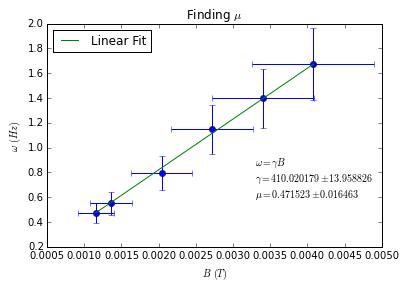

In [99]:
omega = np.divide(2*np.pi, [np.mean([12.8, 14.15, 12.13, 14.08, 13.60]), 11.41, 7.93, 5.48, 4.5, 3.75])
B = np.multiply(1.36e-3, [.85, 1, 1.5, 2, 2.5, 3])
omega_err = np.divide(1.08, [np.mean([12.8, 14.15, 12.13, 14.08, 13.60]), 11.41, 7.93, 5.48, 4.5, 3.75])
B_err = np.multiply(np.sqrt( np.power(np.multiply(np.ones_like(B), .2),2)
                         +np.power(np.divide(.05, [.85, 1, 1.5, 2, 2.5, 3]), 2)), B)
L = .00115
dL = 1e-6

def lin(x, *p):
    return p[0]*x

p, V = curve_fit(lin, B, omega, p0 = [.2])

yFit = lin(B, *p)

data = np.transpose(vstack((omega, omega_err, B, B_err)))

head = "omega \t delta_omega \t B \t delta_B"

os.chdir("/users/aman/desktop")

np.savetxt("magnetic_moment_run2.tsv", data, delimiter="\t", header = head)


errorbar(B, omega, xerr = B_err, yerr = omega_err, fmt = 'o')
plot(B, yFit, label = "Linear Fit")
ylabel("$\omega \, (Hz)$")
xlabel("$B \, (T)$")
title("Finding $\mu$")
text(0.0033,0.6, "$\omega = \gamma B$"\
         "\n"\
        "$\gamma = %f\pm %f$"\
         "\n"\
        "$\mu = %f \pm %f$"% (p[0], V[0,0], p[0]*L, (V[0,0]/p[0] + dL/L)*p[0]*L))
plt.legend(loc = 0)
plt.savefig("rmgvsmub_run2.pdf")

In [97]:
(2/5*(.0269**2)*2*np.pi*4.6)**2 + (1/5*1.37*.0269*2*np.pi*4.6*1e-4)**2 + (2/5*1.37*.0269**2*.1)**2

0.0